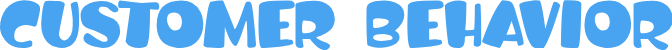




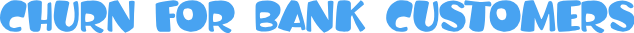

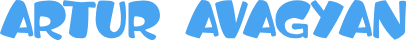

### Import packeges

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Customer_behavior_churn/churn.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Columns

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.


### Number of rows and columns

In [ ]:
df.shape

(10000, 14)

### Information of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no missing values here

In [ ]:
df['CustomerId'].is_unique

True

All cutomers are unique, so drop `RowNumber` and `CustomerId` columns\

### Some distribution plots

In [ ]:
def bar_plot(data,
             column,
             palette="rocket",
             figsize=(10,5),ax=None):
  plt.figure(figsize=figsize) #size of figure
  ax = sns.countplot(ax=ax,y=column,palette=palette,data=data,order = data[column].value_counts().index) #countplot from seaborn
  for index, value in enumerate(data[column].value_counts(ascending=False)): #show values in figure
      ax.text(value, index, str(value))
  ax.set_title('Distribution of '+column)

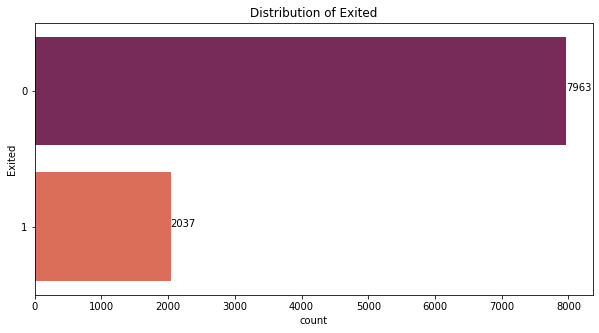

In [ ]:
bar_plot(df,'Exited')

In [ ]:
def categoriacal_by_exited(data,column,figsize=(20, 5)):
  fig, axes = plt.subplots(1, 2, figsize=figsize)

  bar_plot(df,column,ax=axes[0])

  cross_df=pd.crosstab(df['Exited'],df[column])
  sns.heatmap(cross_df,cmap='RdBu', annot=True, fmt="d",ax=axes[1])
  axes[1].set_title("Crosstab of "+"Exited "+" and "+column)
  plt.show()

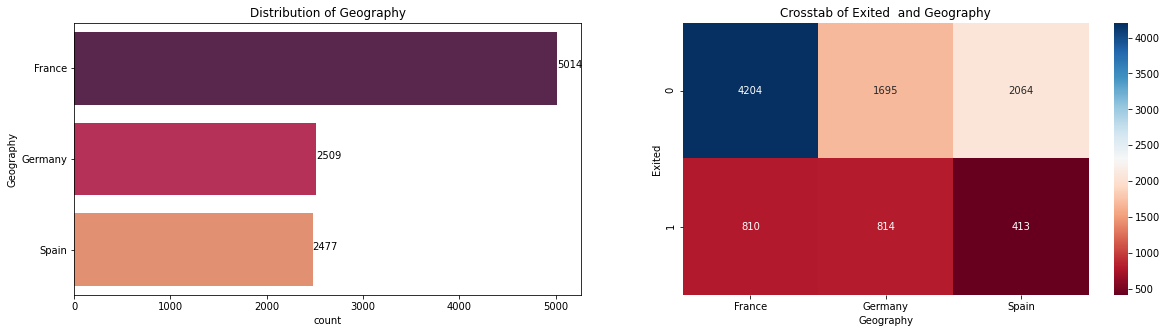

<Figure size 720x360 with 0 Axes>

In [ ]:
categoriacal_by_exited(df,'Geography')

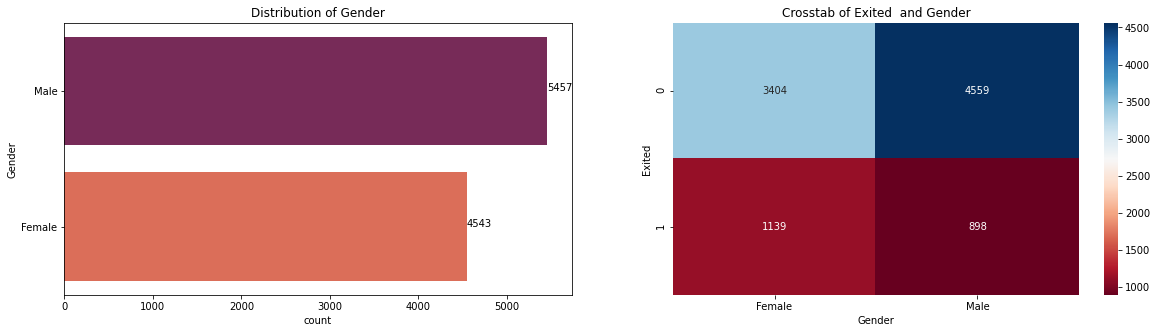

<Figure size 720x360 with 0 Axes>

In [ ]:
categoriacal_by_exited(df,'Gender')

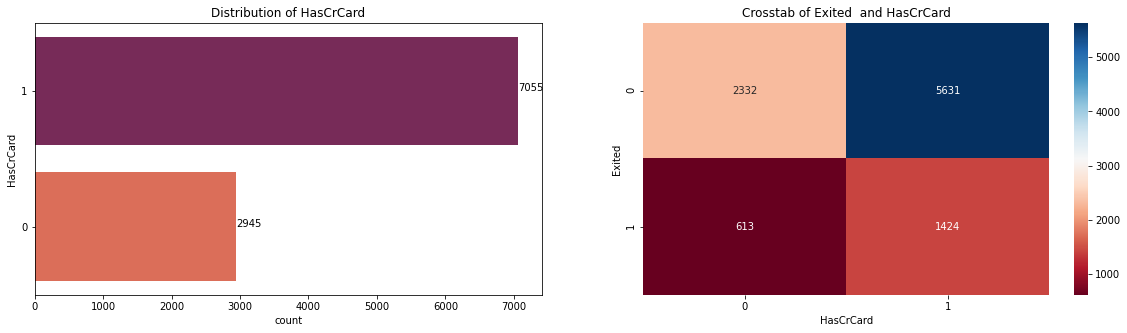

<Figure size 720x360 with 0 Axes>

In [ ]:
categoriacal_by_exited(df,'HasCrCard')

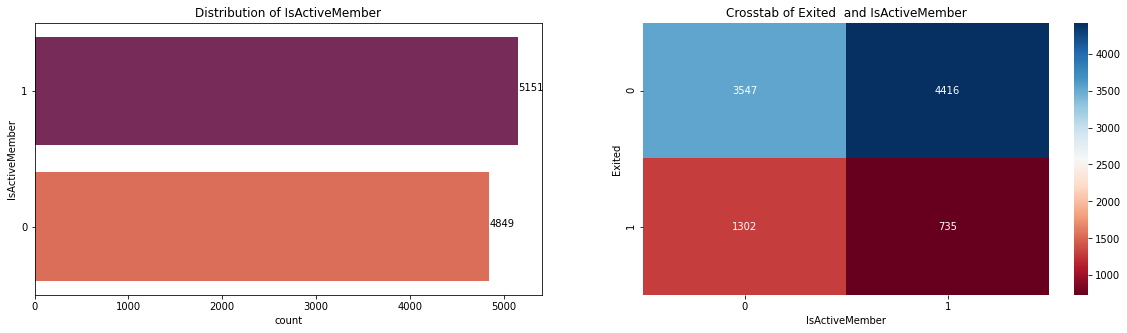

<Figure size 720x360 with 0 Axes>

In [ ]:
categoriacal_by_exited(df,'IsActiveMember')

In [ ]:
def numeric_distplot(data,
                    column,
                    figsize=(20,8)):
  fig, axes = plt.subplots(1, 3, figsize=figsize)
  sns.distplot(ax=axes[0],a=data[column])
  axes[0].set_title('Distribution of '+column)

  sns.distplot(ax=axes[1],a=data[data['Exited']==0][column],hist=False,label='No churn')
  sns.distplot(ax=axes[1],a=data[data['Exited']==1][column],hist=False,label='Churn')
  axes[1].legend()
  axes[1].set_title('Distribution of '+column+' by Exited')

  sns.boxplot(data = data, y=column,x = 'Exited', ax=axes[2])
  axes[2].set_title('Boxplot of '+column+' by Exited')

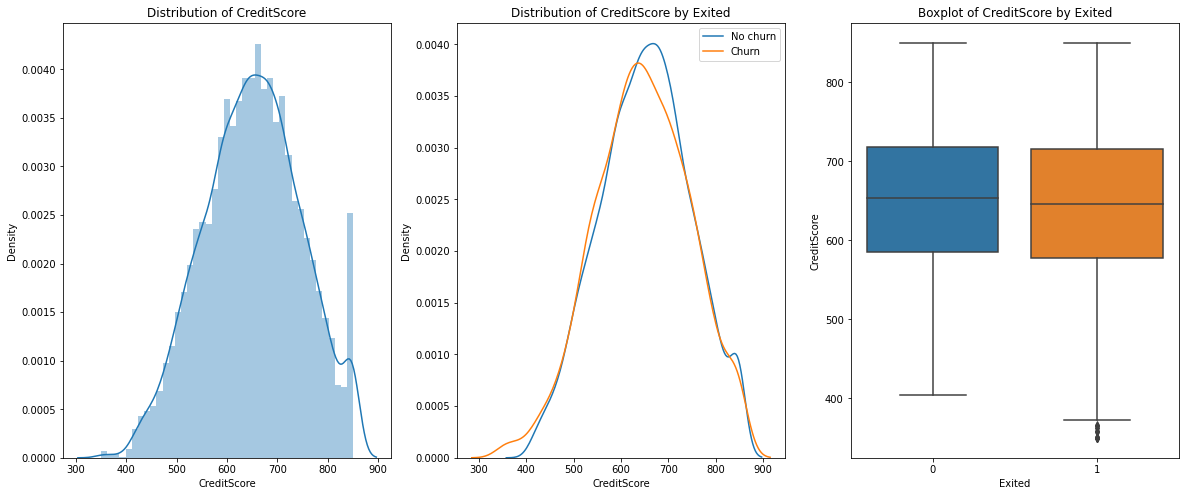

In [ ]:
numeric_distplot(df,'CreditScore')

In [ ]:
print('min(CreditScore)= ',df.CreditScore.min(),'\nmax(CreditScore)= ',df.CreditScore.max())

min(CreditScore)=  350 
max(CreditScore)=  850


In [ ]:
x=df['CreditScore']
conditions  = [ x >= 720, (x < 720) & (x>= 550),x <= 550]
choices     = [ 'Good','Fair','Bad']

df['CreditScore_categorical'] = pd.Categorical(np.select(conditions, choices),
                            categories=choices[::-1],ordered=True)

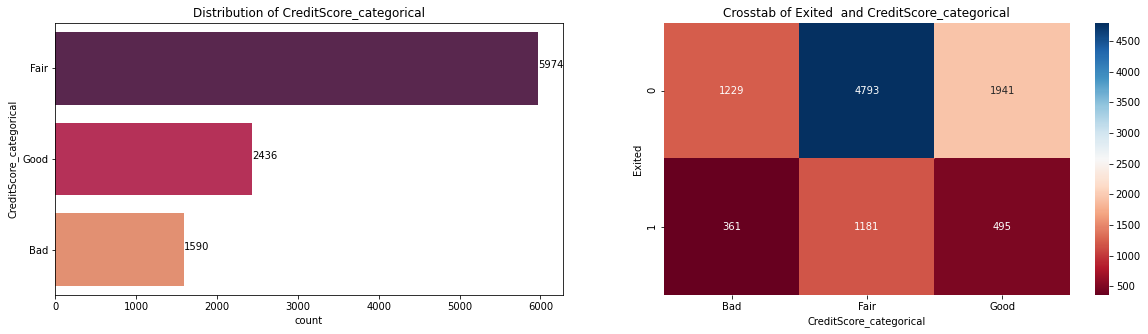

<Figure size 720x360 with 0 Axes>

In [ ]:
categoriacal_by_exited(df,'CreditScore_categorical')

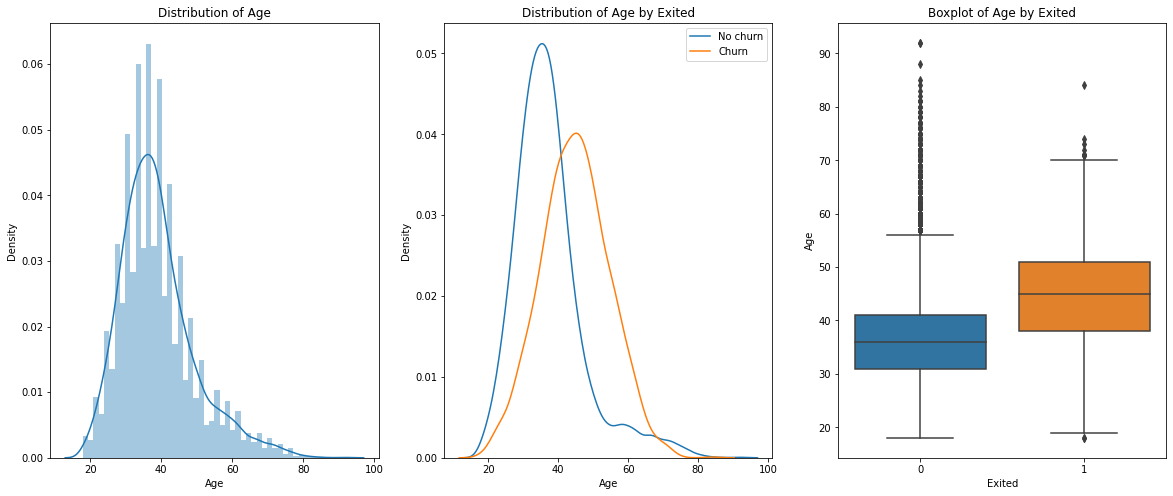

In [ ]:
numeric_distplot(df,'Age')

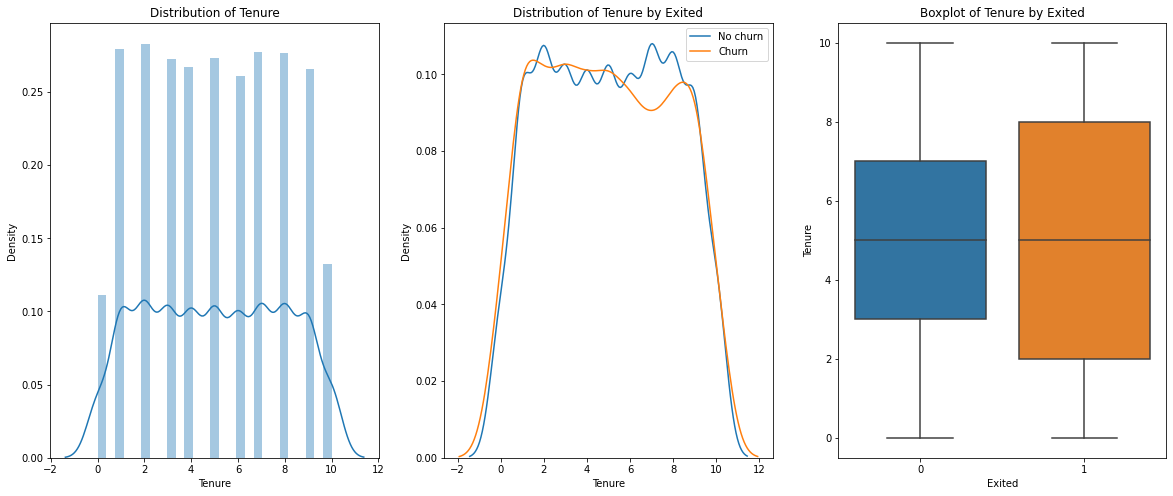

In [ ]:
numeric_distplot(df,'Tenure')

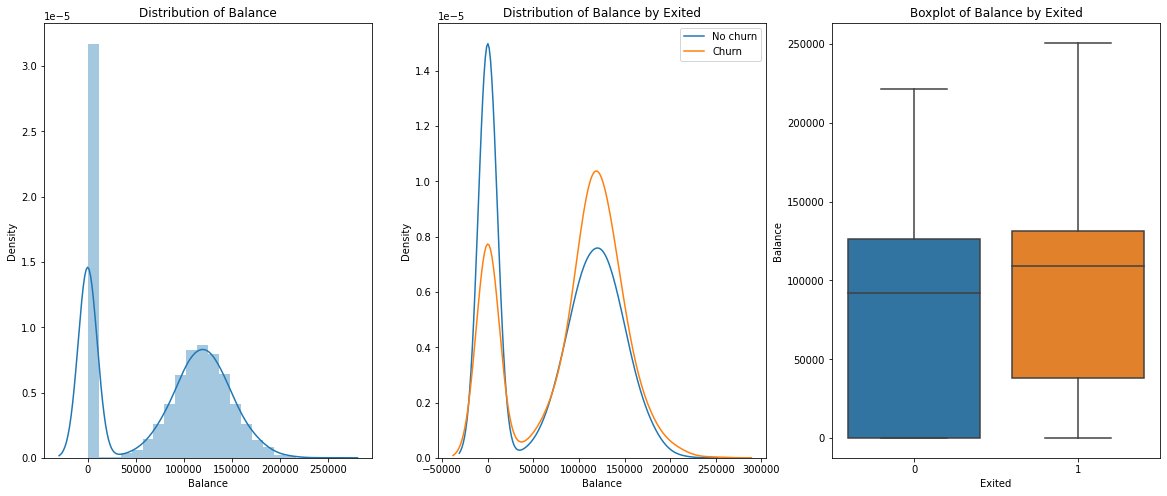

In [ ]:
numeric_distplot(df,'Balance')

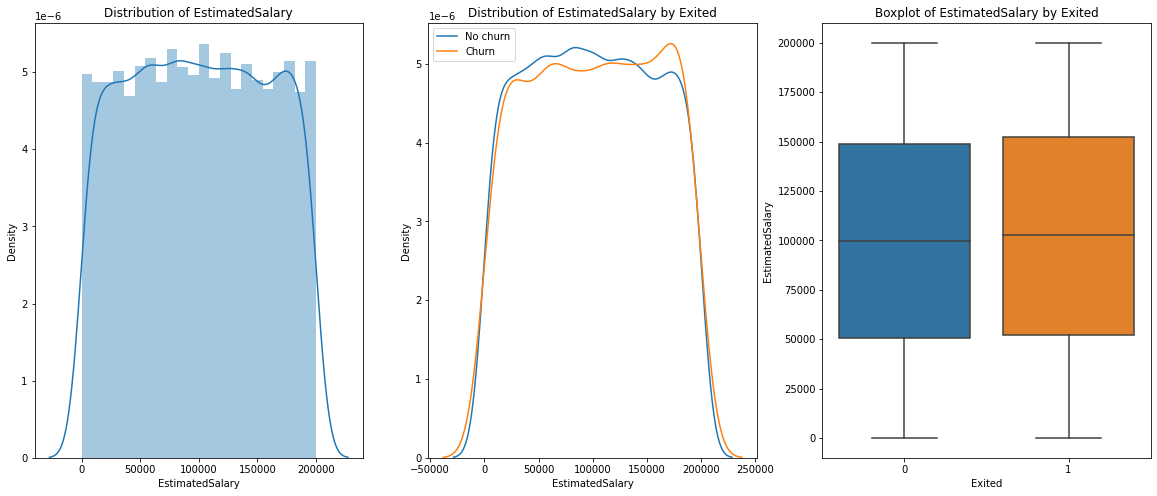

In [ ]:
numeric_distplot(df,'EstimatedSalary')

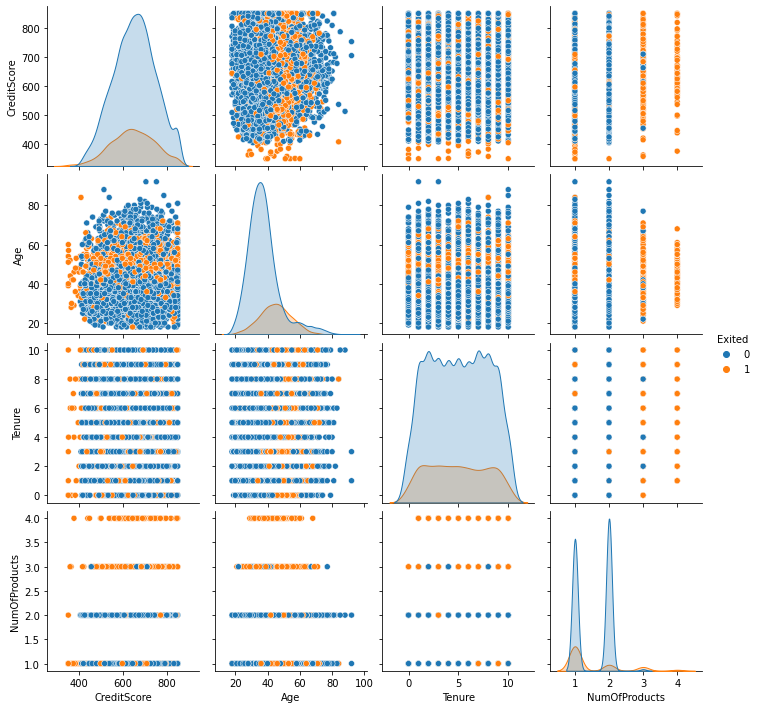

In [ ]:
cols = ['CreditScore', 'Age', 'Tenure','NumOfProducts']
sns.pairplot(df, vars = cols, hue = 'Exited')

## Model preprocessing

In [ ]:
df_2=df.drop(["RowNumber",'CustomerId','Surname','CreditScore_categorical'], axis=1)
df_2 = pd.get_dummies(df_2, columns = ["Geography"],drop_first=True)
df_2.replace({'Female': 0,'Male': 1},inplace=True)
X=df_2.drop(["Exited"], axis=1)
y=df_2['Exited']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(2)
memory usage: 722.8 KB


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix , plot_roc_curve, classification_report

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



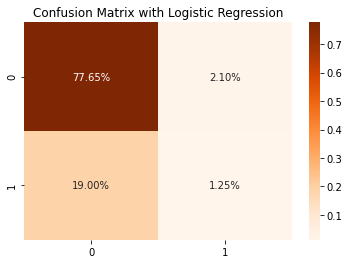

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
cf_matrix = confusion_matrix(y_test, log_reg.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Oranges')
plt.title('Confusion Matrix with Logistic Regression')

print(classification_report(y_test, log_reg.predict(x_test)))

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.78      0.50      0.61       405

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



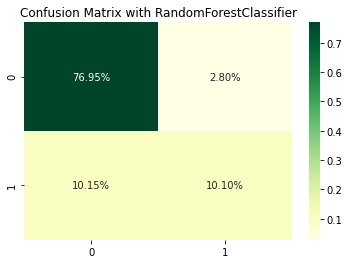

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 1000)
rf_cl.fit(x_train, y_train)

cf_matrix = confusion_matrix(y_test, rf_cl.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='YlGn')
plt.title('Confusion Matrix with RandomForestClassifier')

print(classification_report(y_test, rf_cl.predict(x_test)))

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1595
           1       0.56      0.57      0.56       405

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.82      0.82      0.82      2000



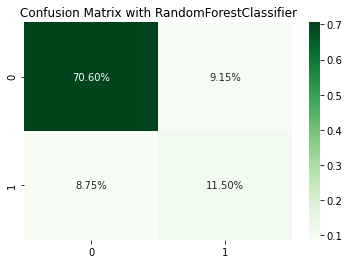

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt_cl = DecisionTreeClassifier(max_depth = 15)
dt_cl.fit(x_train, y_train)

cf_matrix = confusion_matrix(y_test, dt_cl.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')
plt.title('Confusion Matrix with RandomForestClassifier')

print(classification_report(y_test, dt_cl.predict(x_test)))

## Standard Scaler data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler

scaled_cols=StandardScaler().fit_transform(X)
X=pd.DataFrame(scaled_cols, columns=X.columns)

In [ ]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(X,y, test_size = 0.2, random_state = 0)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



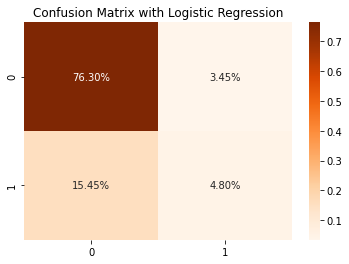

In [ ]:
log_reg_scale = LogisticRegression()
log_reg_scale.fit(x_train_,y_train_)
cf_matrix = confusion_matrix(y_test, log_reg_scale.predict(x_test_))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Oranges')
plt.title('Confusion Matrix with Logistic Regression')

print(classification_report(y_test, log_reg_scale.predict(x_test_)))

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.78      0.50      0.61       405

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



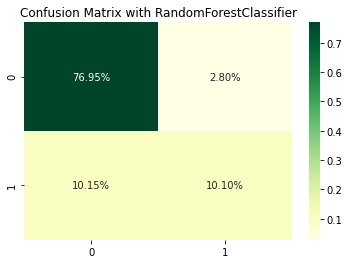

In [ ]:
rf_cl_scale = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 1000)
rf_cl_scale.fit(x_train_, y_train_)

cf_matrix = confusion_matrix(y_test_, rf_cl_scale.predict(x_test_))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='YlGn')
plt.title('Confusion Matrix with RandomForestClassifier')

print(classification_report(y_test_, rf_cl_scale.predict(x_test_)))

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1595
           1       0.66      0.57      0.61       405

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



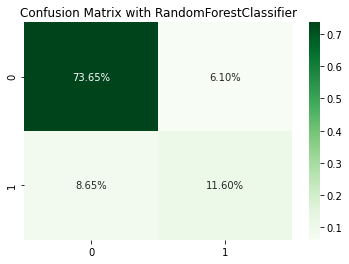

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt_cl_scale = DecisionTreeClassifier(max_depth = 10)
dt_cl_scale.fit(x_train_, y_train_)

cf_matrix = confusion_matrix(y_test_, dt_cl_scale.predict(x_test_))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')
plt.title('Confusion Matrix with RandomForestClassifier')

print(classification_report(y_test, dt_cl_scale.predict(x_test_)))

## Model selection

In [ ]:
models = [
    log_reg,
    log_reg_scale,
    rf_cl,
    rf_cl_scale,
    dt_cl,
    dt_cl_scale]
acc_matrix = pd.DataFrame(columns = ["Models","Accuracy"])


num=0
for model in models:
  if num%2==1:
    names = model.__class__.__name__+'_scale'
    acc_matrix=acc_matrix .append({"Models":names,
                                 "Accuracy":np.mean(y_test== model.predict(x_test_))},
                                 ignore_index=True)
    num+=1
  else:
    names = model.__class__.__name__
    acc_matrix=acc_matrix .append({"Models":names,
                                 "Accuracy":np.mean(y_test== model.predict(x_test))},
                                 ignore_index=True)
    num+=1
acc_matrix

,Models,Accuracy
0,LogisticRegression,0.7890
1,LogisticRegression_scale,0.8110
2,RandomForestClassifier,0.8705
3,RandomForestClassifier_scale,0.8705
4,DecisionTreeClassifier,0.8210
5,DecisionTreeClassifier_scale,0.8525


# Clustering

## KMeans

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Fit thr model

In [ ]:
wcss = []
for i in range(1,45):
    kmeans = KMeans(n_clusters = i,  random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Animate WRSS

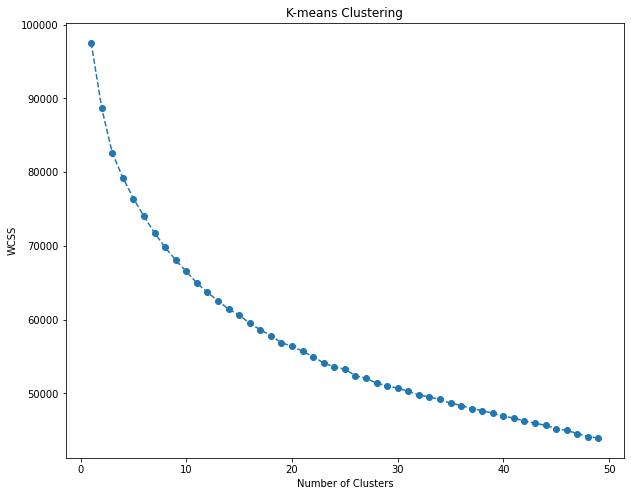

In [ ]:
from IPython.display import clear_output
import time

wcss = []
for x in range(2,51):
  kmeans = KMeans(n_clusters = x,  random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  clear_output(wait=True)
  plt.figure(figsize = (10,8))
  plt.plot(range(1, x), wcss, marker = 'o', linestyle = '--')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.title('K-means Clustering')
  plt.show() 
  time.sleep(0.01)

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Add labels to dataframe

In [ ]:
df['labels'] = kmeans.labels_
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_categorical,labels
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bad,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Good,1


### Is there any difference

In [ ]:
df.groupby(['labels']).mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
labels,,,,,,,,,,,
0,4983.374796,1.568999e+07,651.300163,39.185971,4.976958,123341.940198,1.362153,0.704935,0.498777,100838.280237,0.249592
1,5016.979984,1.569185e+07,649.786499,38.667582,5.047292,31395.215493,1.691915,0.706044,0.530808,99370.383150,0.159537


### ''Confusion matrix''

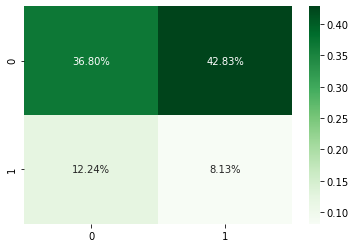

In [ ]:
cf_matrix=confusion_matrix(df['Exited'], df['labels'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')
plt.show()

### Is 5 clusters is good?

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
df['labels'] = kmeans.labels_
df.groupby(['labels']).mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
labels,,,,,,,,,,,
0,5069.821282,1.569089e+07,647.298090,38.635061,4.927012,64774.757094,1.530696,0.000000,0.520464,100948.536596,0.160982
1,4949.092488,1.569196e+07,651.394992,38.886511,5.032310,61843.114705,1.538368,0.694669,0.529483,99446.862355,0.166397
2,4956.682198,1.568804e+07,652.354839,38.206093,4.943250,122594.675585,1.201912,1.000000,0.505376,99431.772312,0.166667
3,5053.601600,1.569274e+07,649.043200,38.694400,5.120000,5946.239285,1.826133,0.997333,0.524267,99487.475973,0.157867
4,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432


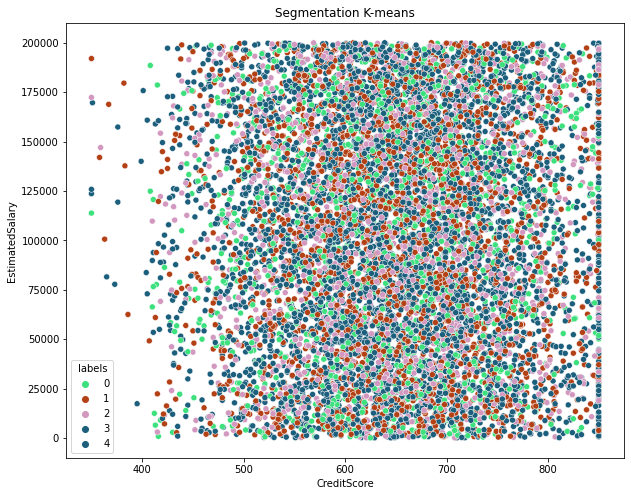

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
df['labels'] = kmeans.labels_
b = df['EstimatedSalary']
a = df['CreditScore']
plt.figure(figsize = (10, 8))
sns.scatterplot(a, b, hue = df['labels'],palette=['#3CE17D','#B44115','#D398BF','#1B5F7D','#1c5F7D'])
plt.title('Segmentation K-means')
plt.show()

## **PCA**

In [ ]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.15042958, 0.10330298, 0.09950794, 0.09302459, 0.09157546,
       0.09082926, 0.08995863, 0.08831544, 0.08088602, 0.06894895,
       0.04322114])

### Animate variance ratios

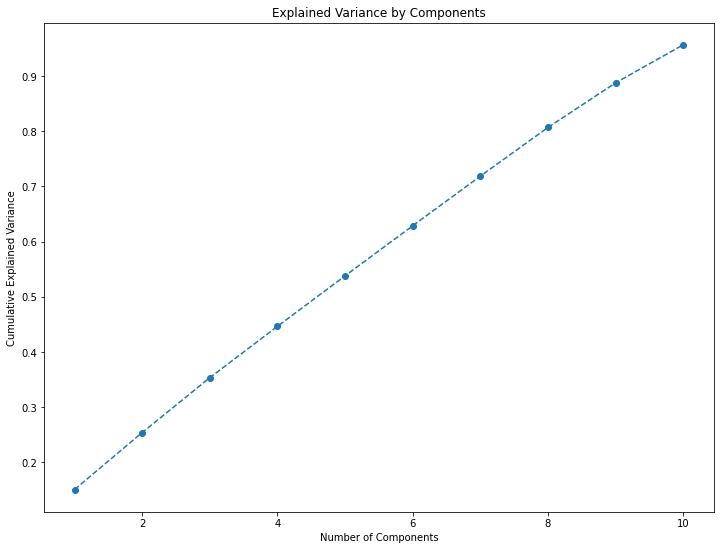

In [ ]:
from IPython.display import clear_output
import time

for x in range(1,len(X.columns)):
  clear_output(wait=True)
  plt.figure(figsize = (12,9))
  plt.plot(range(1,x+1), pca.explained_variance_ratio_[:x].cumsum(), marker = 'o', linestyle = '--')
  plt.title('Explained Variance by Components')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.show() 
  time.sleep(0.01)

### New data frame after **PCA**

In [ ]:
pca = PCA(n_components = 4)
pca.fit(X)
pca_data=pca.transform(X)
pca_data=pd.DataFrame(data=pca_data,columns=['Col1','Col2','Col3','Col4'])
pca_data

,Col1,Col2,Col3,Col4
0,0.526819,-0.376014,0.968160,0.386196
1,0.726318,-2.095834,0.727685,2.072670
2,-0.009900,2.116374,-0.149913,0.261127
3,0.993175,0.933032,0.792027,2.028063
4,0.324849,-2.000789,0.808253,0.073848
...,...,...,...,...
9995,1.052729,1.121701,-0.210842,-0.870959
9996,0.122734,-0.355508,-0.881249,-1.478731
9997,0.630178,-0.438718,0.763775,0.400752
9998,-1.083290,1.229480,0.264275,-0.719720


### Is there are difference in data by labels

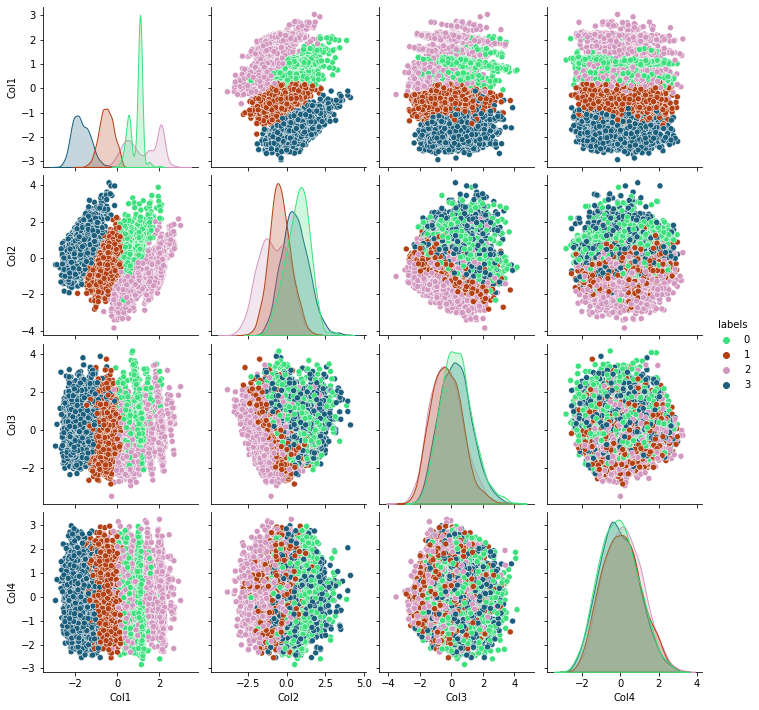

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pca_data['labels'] = kmeans.labels_

sns.pairplot(pca_data, hue = 'labels',palette=['#3CE17D','#B44115','#D398BF','#1B5F7D'])
plt.show()

# Best Regards

<h4 align="left">Artur Avagyan</h4>
    <ul>
    <li>Actuarial supervisor at Central Bank of Armenia</li>
    <li>Student from YSU (Data Science for Business Master's Degree Program)</li>
    <li>E-mail:   avagyan.artur97@gmail.com</li>
    <li>LinkedIn: <a href="https://www.linkedin.com/in/artur-avagyan-0a16311b3">Artur Avagyan</a></li>
    <li>GitHub:   <a href="https://github.com/artur-avagyan">Artur Avagyan</a></li>
    <li>Phone:    +37498641815</li>
    </ul>

<h3 align="center">YSU DSB 2020-2021</h3>